## 0.1 VS Code

### 0.1.1 安装VS Code

### 0.1.2 配置VS Code

## 0.2 Anaconda

### 0.2.1 安装Anaconda

### 0.3.2 配置Conda镜像源

### 0.3.3 配置pip镜像源

## 0.3 Docker

### 0.3.1 安装Docker

Docker安装文档：https://docs.docker.com/get-started/get-docker/

接着检查Docker的WSL集成状态，打开Docker Desktop，进入“Settings” -> “Resources” -> “WSL Integration”，确保“Enable integration with my default WSL distro”和所需发行版均已勾选。若未勾选，开启后点击“Apply & Restart”按钮应用设置并重启Docker。

### 0.3.2 改变Docker镜像源

#### 0.3.2.1 修改Docker Engine镜像源（首推）

1. 启动Docker Desktop，若无弹出窗口可能是已经有Docker在运行，可在任务栏点击Docker图标进入Docker Desktop
2. 点击 Docker Desktop 右上角的「设置」（齿轮图标）
3. 左侧选择「Docker Engine」
4. 在「Daemon」配置文件中，找到 `"registry-mirrors": []`，复制粘贴以下内容：
    ```json
    {
    "registry-mirrors": [
        "https://hub-mirror.c.163.com", 
        "https://mirror.aliyuncs.com", 
        "https://docker.mirrors.ustc.edu.cn"
    ]
    }
    ```

#### 0.3.2.2 并非联动Docker Desktop的WSL发行版更改镜像源（罕见）

上一种方法仅适用于Windows端Docker Desktop联动WSL发行版的情况，若仍然无法拉取镜像，可以尝试以下方法：

首先运行并配置WSL环境，可在开始菜单中搜索Ubuntu并打开，在对话框中逐行运行以下命令以进入镜像源编辑页：
```bash
sudo mkdir -p /etc/docker
sudo nano /etc/docker/daemon.json
```

复制粘贴以下内容：
```json
{
  "registry-mirrors": [
    "https://hub-mirror.c.163.com",        // 网易镜像源（稳定）
    "https://mirror.aliyuncs.com",         // 阿里云镜像源（推荐）
    "https://docker.mirrors.ustc.edu.cn"   // 中科大镜像源（备用）
  ]
}
```

界面如下：
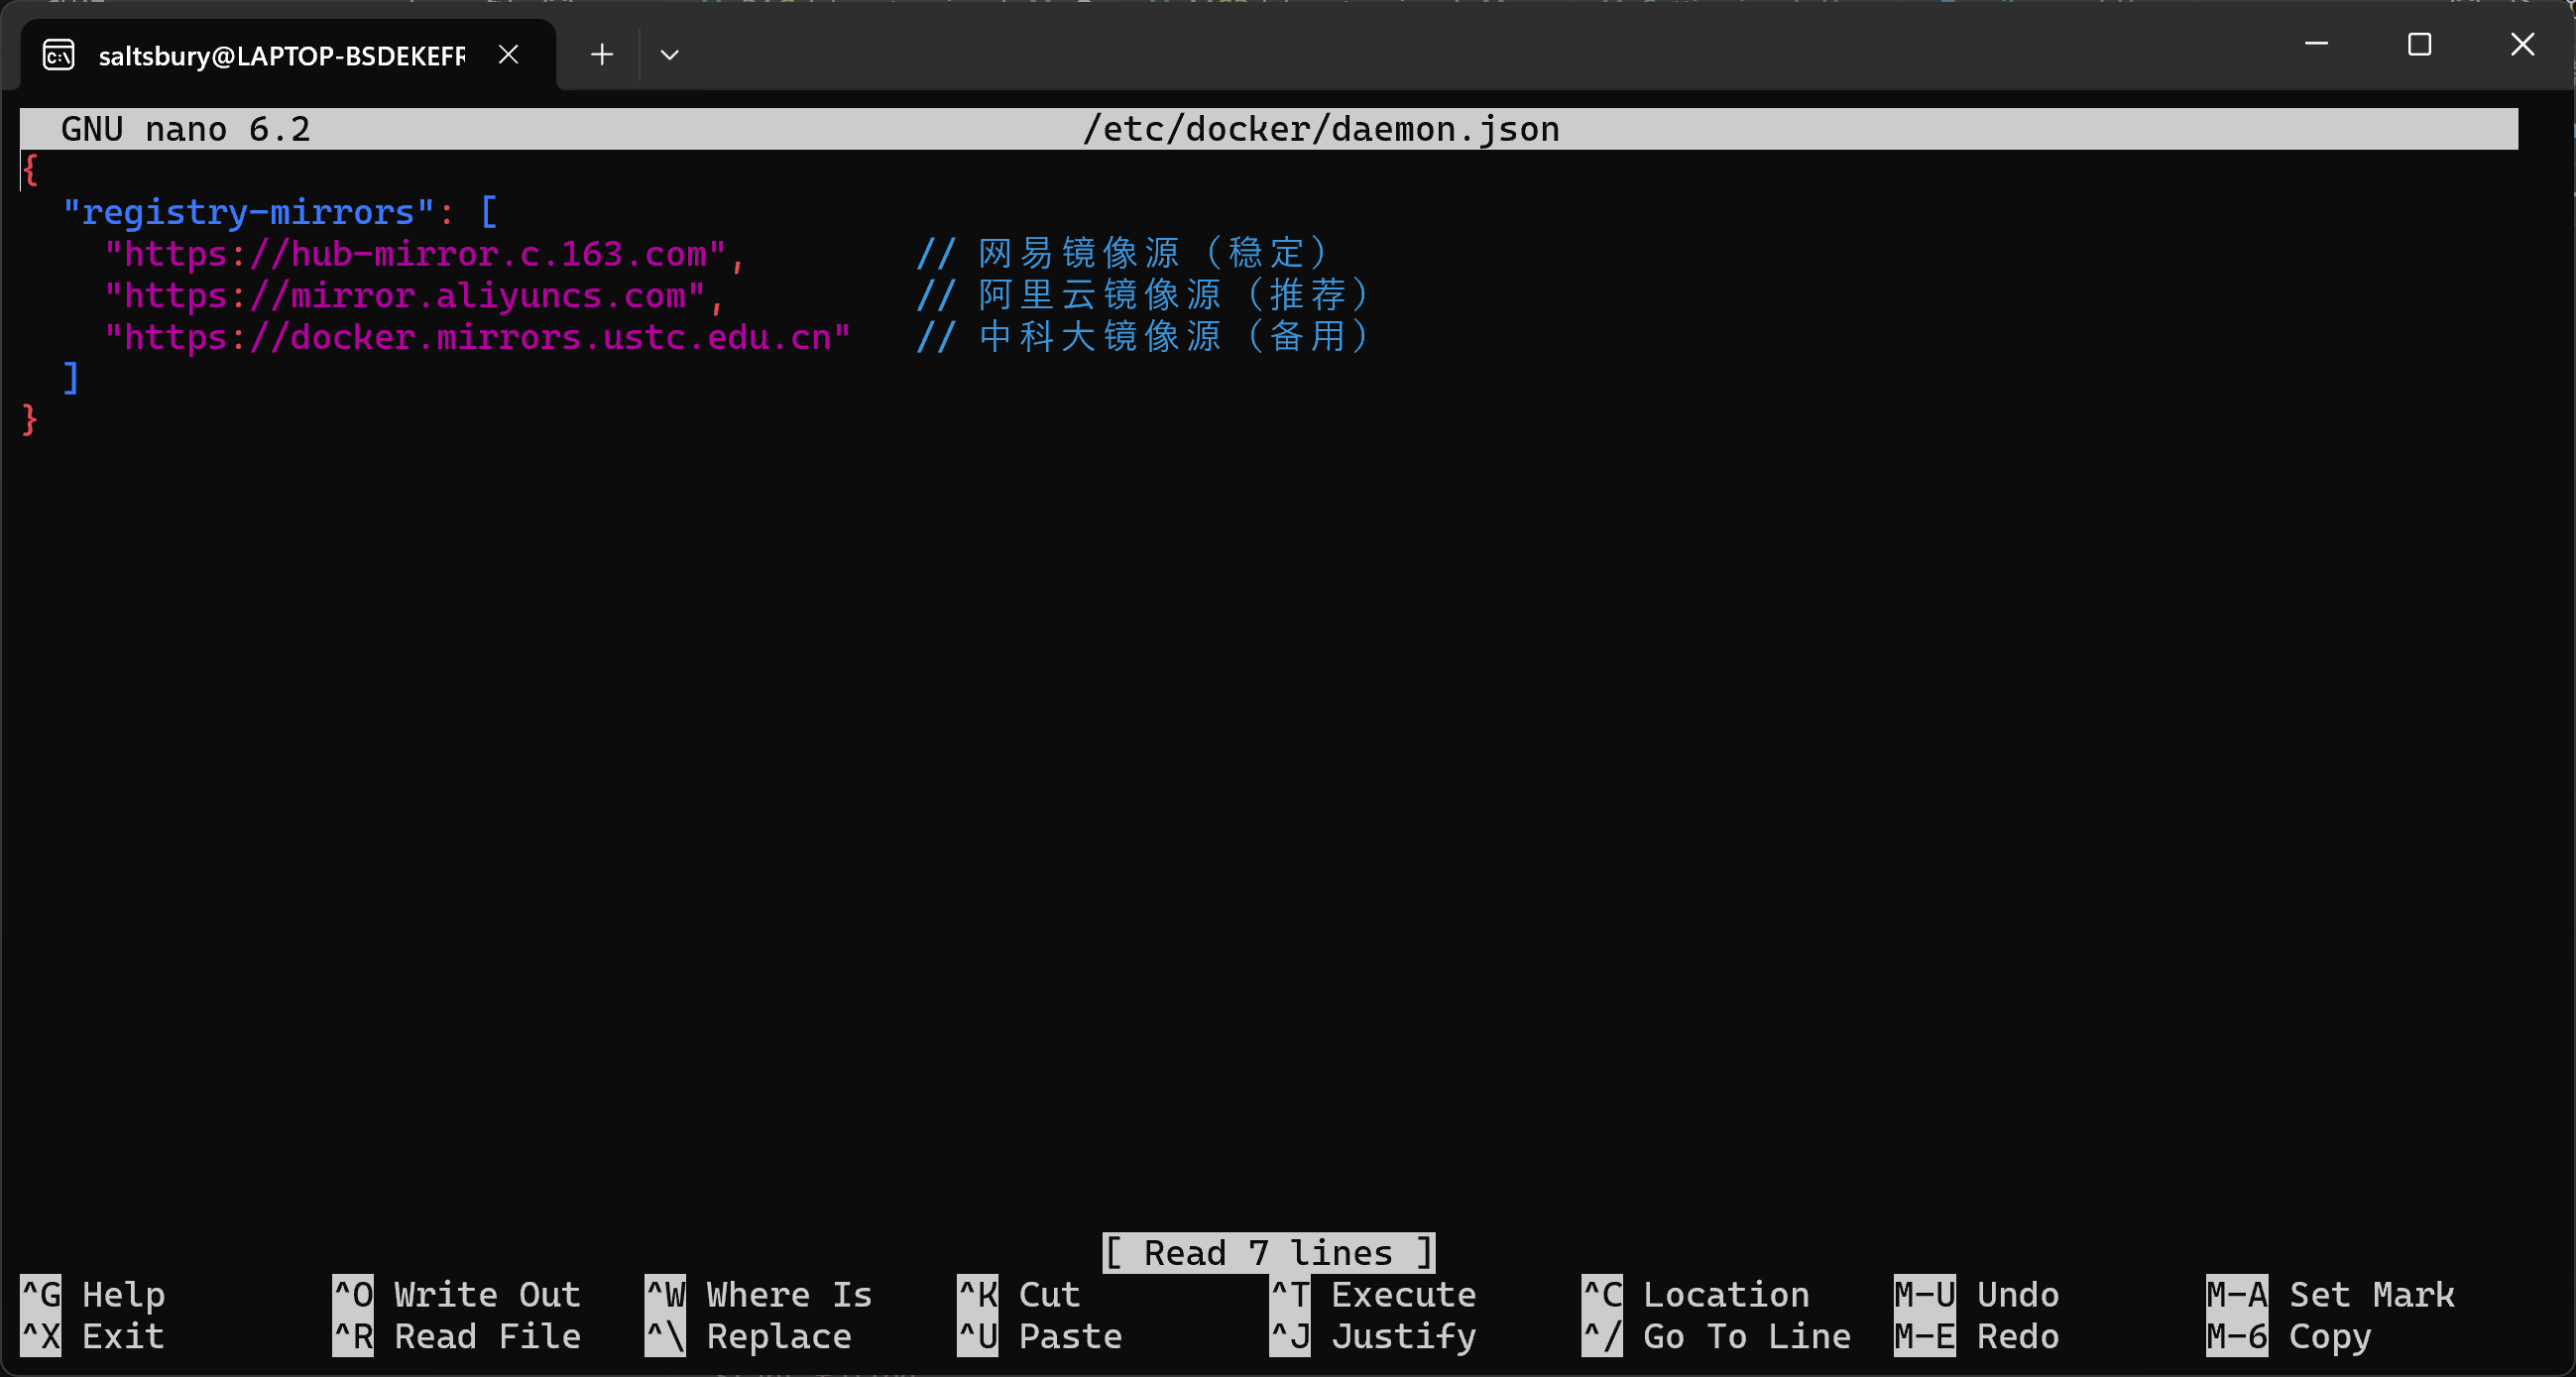

保存并退出：按 `Ctrl + O` 保存，按 `Enter` 确认文件名，按 `Ctrl + X` 退出编辑器。

最后，重启Docker服务：
```bash
sudo systemctl daemon-reload
sudo systemctl restart docker

docker info | grep "Registry Mirrors"
```

## 0.4 WSL2

### 0.4.1 安装WSL2

直接在Windows终端（PowerShell或CMD）中运行以下命令：

```bash
wsl --install
```

访问官方教程 https://learn.microsoft.com/zh-cn/windows/wsl/install

### 0.4.2 安装Ubuntu等distribution

下面提供0.4.2.1和0.4.2.2两种安装方式，一种是通过Microsoft Store的用户界面进行安装，另一种是自行下载安装包并通过命令行安装（操作较复杂但下载速度较快）。

#### 0.4.2.1 在microsoft store用户界面中安装

打开Microsoft Store，搜索“Ubuntu”，选择一个版本（如Ubuntu 20.04 LTS），点击“获取”进行安装。安装完成后，点击“启动”以完成初始设置。

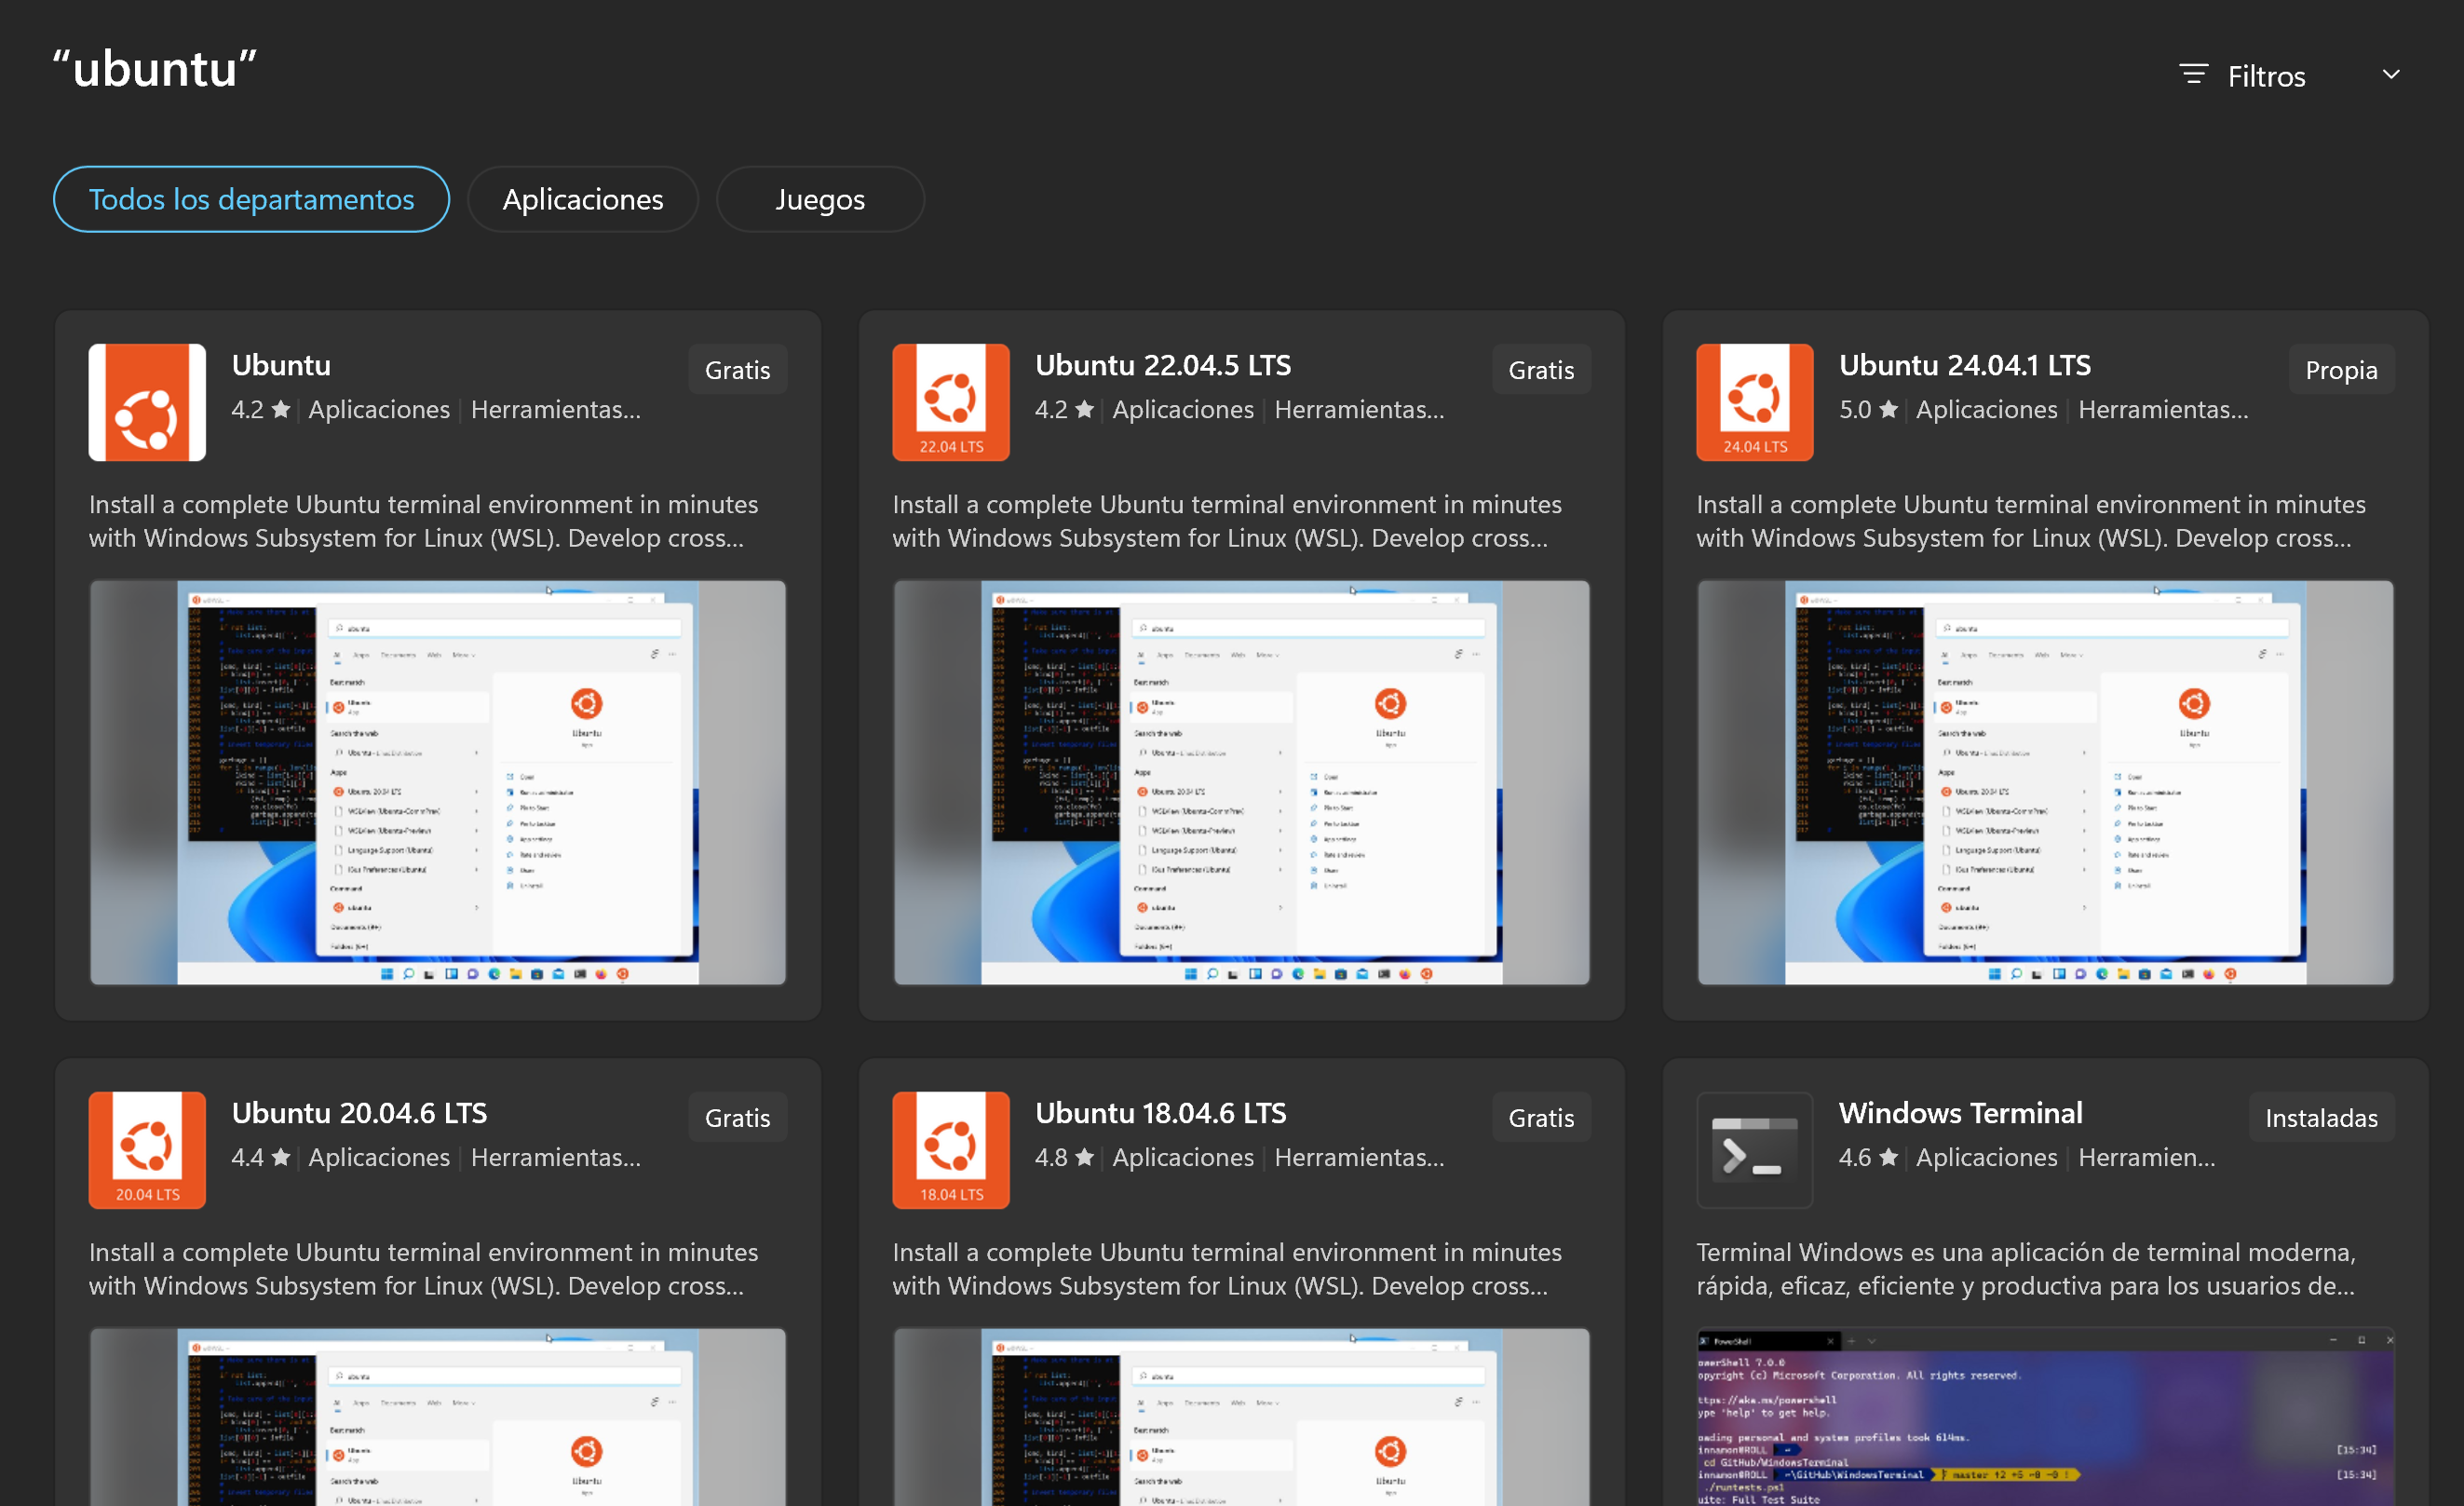

#### 0.4.2.2 自行下载离线包（推荐）

WSL（Windows Subsystem for Linux）中Ubuntu等发行版下载慢的核心原因是默认从微软海外服务器拉取，为了加快安装速度，可提前下载好离线包，然后通过命令行安装。

#### 0.4.2.2.1 确定要安装的WSL发行版
常见发行版的WSL官方离线包地址如下，直接点击链接，或将链接复制到下载工具中即可开始下载。

| 发行版         | 微软官方离线包地址|
|----------------|---------------------------------------------------------------------------------|
| Ubuntu 24.04   | https://aka.ms/wslubuntu2404                                                     |
| Ubuntu 22.04 （推荐）  | https://aka.ms/wslubuntu2204                                                     |
| Ubuntu 20.04   | https://aka.ms/wslubuntu2004                                                     |
| Debian         | https://aka.ms/wsldebian                                                         |
| Kali Linux     | https://aka.ms/wslkali-linux                                                     |
| OpenSUSE       | https://aka.ms/wslopensuse-15.5                                                  |

#### 0.4.2.2.2 安装离线包
下载完成后（文件后缀是 `.appx`/`.msix`），右键以管理员身份打开PowerShell，执行安装命令：
```powershell
# 以Ubuntu 22.04为例，替换成你的包名（比如Ubuntu_2204.2023.825.0_x64.appx）
wsl --install --distribution Ubuntu-22.04 --package-path "C:\下载\Ubuntu_2204.2023.825.0_x64.appx"
```

双击`.appx`进入安装界面，点击“安装”按钮进行安装。
设置用户名和密码：安装完成后，首次启动WSL发行版时会提示设置Linux用户名和密码，请牢记该用户名和密码，因为后续操作需要使用它们。
```
Installing, this may take a few minutes...
Please create a default UNIX user account. The username does not need to match your Windows username.
For more information visit: https://aka.ms/wslusers
```

需要注意的是，密码输入时不会显示任何字符（包括星号），这是Linux系统的正常行为，请直接输入密码后按回车键即可。

```
Enter new UNIX username: 
New password:
Retype new password:
passwd: password updated successfully
Installation successful!
To run a command as administrator (user "root"), use "sudo <command>".
See "man sudo_root" for details.
```

接下来你可能会看到形如`username@DESKTOP-XXXXXXX:~$`的提示符，表示你已经成功进入了WSL发行版的命令行界面，安装已经完成。

#### 0.4.3 验证WSL环境


打开新的命令行窗口，执行 `wsl -l -v`：
```bash
wsl -l -v
```

若输出如下所示，说明WSL和Ubuntu发行版均已正确安装（星号*表示当前默认运行的发行版）：
```
  NAME                   STATE           VERSION
* Ubuntu-22.04           Running         2      
```

若要关闭某一个虚拟机，可以执行 `wsl --terminate <发行版名称>` 命令，例如：
```bash
wsl --terminate Ubuntu
```

若输出如下所示，说明虚拟机已成功关闭：
```
  NAME                   STATE           VERSION
* Ubuntu-22.04           Stopped         2      
```

### WSL发行版更改镜像（基本不会使用到这一步）